In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
model = keras.Sequential()                         # using the add method to create a sequential model
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
model.weights               # At this point the model isn't built yet, so no wights have been created

[]

In [4]:
model.build(input_shape=(None, 3))      # now you can retrieve the model's weight
#model.weights[:1]

In [5]:
# displaying the content of the model via summary() method
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

The model is named "sequential_1", we can name model and even layers in keras

In [6]:
model = keras.Sequential(name='my_example_model')
model.add(layers.Dense(64, activation='relu', name='my_first_layer'))
model.add(layers.Dense(10, activation='softmax', name='my_second_layer'))

model.build((None, 3))
model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_second_layer (Dense)         │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

Since you cant print summary until the model is built, lets build the sequential on the fly via the input class:

In [7]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))     #shape must be the shape of each sample, not the shape of the batch
model.add(layers.Dense(64, activation='relu'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

we can follow up how the model changes by using the summary() method as we add more layers. This is used in debugging workflow

In [8]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

## exploring the functional API
lets start with a simple example:

In [9]:
inputs = keras.Input(shape=(3,), name="my_input")   # we start by declaring an input, this holds info about shape and dtype of the data
features = layers.Dense(64,activation='relu')(inputs)  # this returns new symbolic tensor with updated shape and dtype information
outputs = layers.Dense(10, activation='softmax')(features) # Here, we are obtaining the output
model = keras.Model(inputs=inputs, outputs=outputs)   # we instantiate the model by specifying its inputs and outputs in the model constructor

In [10]:
inputs

<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=my_input>

In [11]:
features

<KerasTensor shape=(None, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_10>

In [12]:
outputs

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, ragged=False, name=keras_tensor_11>

In [13]:
model.summary()      # getting the information about the model

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Multi-Input, Multi-Output Models
Lets try building systems to rank customers support tickets by priority and route them to the approprite department.

SAY, the model has three inputs:

(1) the title of the tickets(text input)

(2) the text body of the ticket(text input)

(3) Any tags added by the user(categorical input, assumed here to be one hot encode)

And has two Outputs:

(1)The priority score of the ticket, a scaler between 0 and 1(sigmoid output)

(2) the Department that should handle the tickets(a softmax over the set of departments)

Lets build the model

In [14]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

In [15]:
#defining model inputs
title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

features = layers.concatenate([title, text_body, tags])   #combining input features into a single tensor,features
features = layers.Dense(64, activation='relu')(features)    #applying an intermediate layer to recombine input features into richer representations

# defining model outputs
priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_departments, activation='softmax', name='department')(features)

#creating the model
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [16]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 10000)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_body           │ (None, 10000)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 100)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 20100)     │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ text_body[0][0],  │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │  1,286,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         65 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department (Dense)  │ (None, 4)         │        260 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,286,789 (4.91 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

TRAINING A MULTI-INPUT, MULTI-OUTPUT MODEL

lets continue :

In [17]:
import numpy as np

In [18]:
num_samples = 1280   # data points

In [19]:
# Dummy input data
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# Dummy targets data
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer='rmsprop',
              loss=['mean_squared_error', 'categorical_crossentropy'],
              metrics=[['mean_absolute_error'],['accuracy']])

model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=2)

model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

priority_preds, department_preds = model.predict([title_data, text_body_data,
                                                  tags_data])

Epoch 1/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - department_accuracy: 0.2129 - department_loss: 40.5386 - loss: 40.8454 - priority_loss: 0.3067 - priority_mean_absolute_error: 0.4698
Epoch 2/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - department_accuracy: 0.2302 - department_loss: 34.2694 - loss: 34.5875 - priority_loss: 0.3181 - priority_mean_absolute_error: 0.4895
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - department_accuracy: 0.2673 - department_loss: 41.2653 - loss: 41.5834 - priority_loss: 0.3181 - priority_mean_absolute_error: 0.4874
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


We can also do the above by providing dicts of inputs and targets arrays instead of relying on the order.  This makes it easy to track what you are doing especially if inputs/outputs are many.

In [20]:
model.compile(optimizer='rmsprop',
              loss={"priority":"mean_squared_error","department":"categorical_crossentropy"},
              metrics={"priority":["mean_absolute_error"],"department":["accuracy"]})

model.fit({"title":title_data, "text_body":text_body_data, "tags":tags_data},
          {"priority":priority_data, "department":department_data}, epochs=1)

model.evaluate({"title":title_data, "text_body":text_body_data,
                "tags":tags_data},
               {"priority":priority_data, "department":department_data})

priority_pred, department_pred = model.predict({"title":title_data, "text_body":text_body_data, "tags":tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - department_accuracy: 0.2535 - department_loss: 66.7955 - loss: 67.1175 - priority_loss: 0.3220 - priority_mean_absolute_error: 0.4855
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - department_accuracy: 0.0613 - department_loss: 62.1600 - loss: 62.4781 - priority_loss: 0.3181 - priority_mean_absolute_error: 0.4874
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


THE POWER OF THE FUNCTIONAL API: Access to layer connectivity.

lets visualize the connectivity of the model we just defined

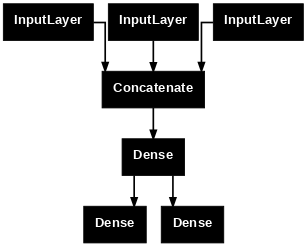

In [23]:
keras.utils.plot_model(model, "ticket_classifier.png", dpi=60)  #dpi is dot per inch. I made it smaller to fit my screen for easy visualization

TO add to the above plot input and output shape of each layer of the model, we will use the show_shapes=True. This will be very helpful in debugging

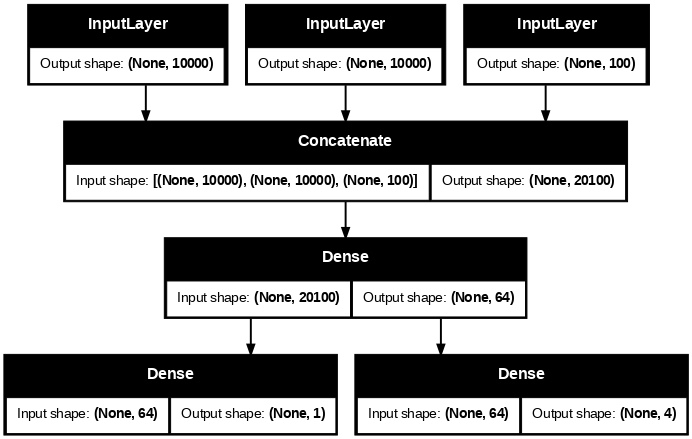

In [24]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", dpi=70, show_shapes=True)

wow ! This is powerful. remember the None in the shape represent the batch size. This model will work with sample of any batch.

Also, by accessing the layer connectivity as above, we can use inspect and reuse individual nodes, i.e. the layer cells in the graph. the "model.layer" model provides the list of layers that makes up the model, which can also be queried. Lets see:

In [25]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [26]:
# lets query
model.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=False, ragged=False, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=False, ragged=False, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=False, ragged=False, name=tags>]

In [27]:
model.layers[3].output

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, ragged=False, name=keras_tensor_12>

This enables feature extraction, creating models that reuse intermediate features from another model.